In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats


### Reading in the data

In [2]:
local_path=r'C:/Users/ddrye/OneDrive/Documents/OMSA_Program/OMSA 2023\Summer2023/Practicum/off_git/data/'
df=pd.read_csv(local_path+r"2014_2020_all_tract.csv")
df=df.sort_values(by=['FIPS','year'])

### Getting rough structure of combined dataset

In [3]:
pd.set_option('display.max_columns', None)
display(df.head(3))
df.describe()

longitude  latitude        FIPS     avg_co2  year   ST     STATE  \
281336      -86.5      32.5  1001020100  397.493357  2014  1.0   Alabama   
281337      -86.5      32.5  1001020100  400.242485  2015  1.0   Alabama   
281341      -86.5      32.5  1001020100  403.473628  2016  1.0   Alabama   

       ST_ABBR  STCNTY    COUNTY      FIPS.1  \
281336      AL  1001.0   Autauga  1001020100   
281337      AL  1001.0   Autauga  1001020100   
281341      AL  1001.0   Autauga  1001020100   

                                         LOCATION  year.1  total_population  \
281336  Census Tract 201, Autauga County, Alabama    2014            1900.0   
281337  Census Tract 201, Autauga County, Alabama    2015            1955.0   
281341  Census Tract 201, Autauga County, Alabama    2016            2010.0   

        housing_units  num_households  unemployment  socioeconomic  \
281336          714.0           688.0          48.0        0.43990   
281337          732.5           714.0          45.5        0.41425   
281341          751.0           740.0          43.0        0.38860   

        household_comp  minority_status  housing_type  overall_svi  xco2_std  \
281336         0.34030          0.31340        0.3634      0.34660  2.061153   
281337         0.28785          0.34945        0.2341      0.26925  2.007512   
281341         0.23540          0.38550        0.1048      0.19190  1.196374   

        co2_1yr_change  co2_6yr_change  co2_1yr_pct_change  \
281336             NaN             NaN                 NaN   
281337        2.749128             NaN            0.006916   
281341       -1.952021             NaN           -0.004815   

        co2_6yr_pct_change  co2_5yr_pct_change  co2_4yr_pct_change  \
281336                 NaN                 NaN                 NaN   
281337                 NaN                 NaN                 NaN   
281341                 NaN            0.015045            0.008073   

        co2_3yr_pct_change  co2_2yr_pct_change  
281336                 NaN                 NaN  
281337                 NaN                 NaN  
281341           -0.016882           -0.023025

longitude       latitude          FIPS        avg_co2  \
count  485366.000000  485366.000000  4.853660e+05  485366.000000   
mean      -91.318922      37.884322  2.786206e+10     405.297424   
std        15.776302       5.082026  1.580793e+10       5.048107   
min      -167.500000      25.500000  1.001020e+09     395.892359   
25%       -97.500000      34.500000  1.211998e+10     400.476138   
50%       -86.500000      38.500000  2.714317e+10     405.795074   
75%       -79.500000      41.500000  4.103336e+10     409.969879   
max       -67.500000      64.500000  5.604595e+10     414.554260   

                year             ST         STCNTY        FIPS.1  \
count  485366.000000  485366.000000  485366.000000  4.853660e+05   
mean     2016.882892      27.775852   27861.799879  2.786206e+10   
std         1.967025      15.784259   15807.928453  1.580793e+10   
min      2014.000000       1.000000    1001.000000  1.001020e+09   
25%      2015.000000      12.000000   12119.000000  1.211998e+10   
50%      2017.000000      27.000000   27143.000000  2.714317e+10   
75%      2019.000000      41.000000   41033.000000  4.103336e+10   
max      2020.000000      56.000000   56045.000000  5.604595e+10   

              year.1  total_population  housing_units  num_households  \
count  485366.000000     485366.000000  485366.000000   485366.000000   
mean     2016.882892       4270.770834    1806.093518     1586.602549   
std         1.967025       2057.206498     832.108895      738.051314   
min      2014.000000          0.000000       0.000000        0.000000   
25%      2015.000000       2874.000000    1254.500000     1087.500000   
50%      2017.000000       4022.000000    1709.500000     1507.000000   
75%      2019.000000       5348.000000    2244.000000     1988.500000   
max      2020.000000      70271.000000   26436.000000    21337.000000   

        unemployment  socioeconomic  household_comp  minority_status  \
count  485366.000000  485366.000000   485366.000000    485366.000000   
mean      151.031835      -7.029511       -5.998009        -4.897948   
std       114.160337      85.479797       79.543718        72.792417   
min      -999.000000    -999.000000     -999.000000      -999.000000   
25%        72.500000       0.248812        0.259800         0.246100   
50%       124.000000       0.500550        0.504500         0.495900   
75%       199.000000       0.750650        0.745400         0.745300   
max      2364.000000       1.000000        1.000000         1.000000   

        housing_type    overall_svi       xco2_std  co2_1yr_change  \
count  485366.000000  485366.000000  485366.000000   412917.000000   
mean       -6.796264      -7.407435       2.237047        0.015710   
std        84.071361      87.593054       0.562484        7.591815   
min      -999.000000    -999.000000       0.906687      -16.194244   
25%         0.254500       0.250000       1.728153       -5.915441   
50%         0.502800       0.501750       2.250151        1.949132   
75%         0.749400       0.752000       2.726964        5.952548   
max         1.000000       1.000000       3.853587       16.137922   

       co2_6yr_change  co2_1yr_pct_change  co2_6yr_pct_change  \
count    62011.000000       412917.000000        62011.000000   
mean         0.151132            0.000215            0.000559   
std          7.711754            0.018733            0.019047   
min        -16.096046           -0.039197           -0.039042   
25%         -6.004117           -0.014656           -0.014809   
50%          1.819606            0.004833            0.004482   
75%          5.799454            0.014887            0.014594   
max         16.137922            0.040699            0.040620   

       co2_5yr_pct_change  co2_4yr_pct_change  co2_3yr_pct_change  \
count       123121.000000       195570.000000       268019.000000   
mean             0.000189           -0.000126           -0.000074   
std              0.020146            0.019000         

### Identify Outliers

Box Plots

<Axes: xlabel='co2_2yr_pct_change'>

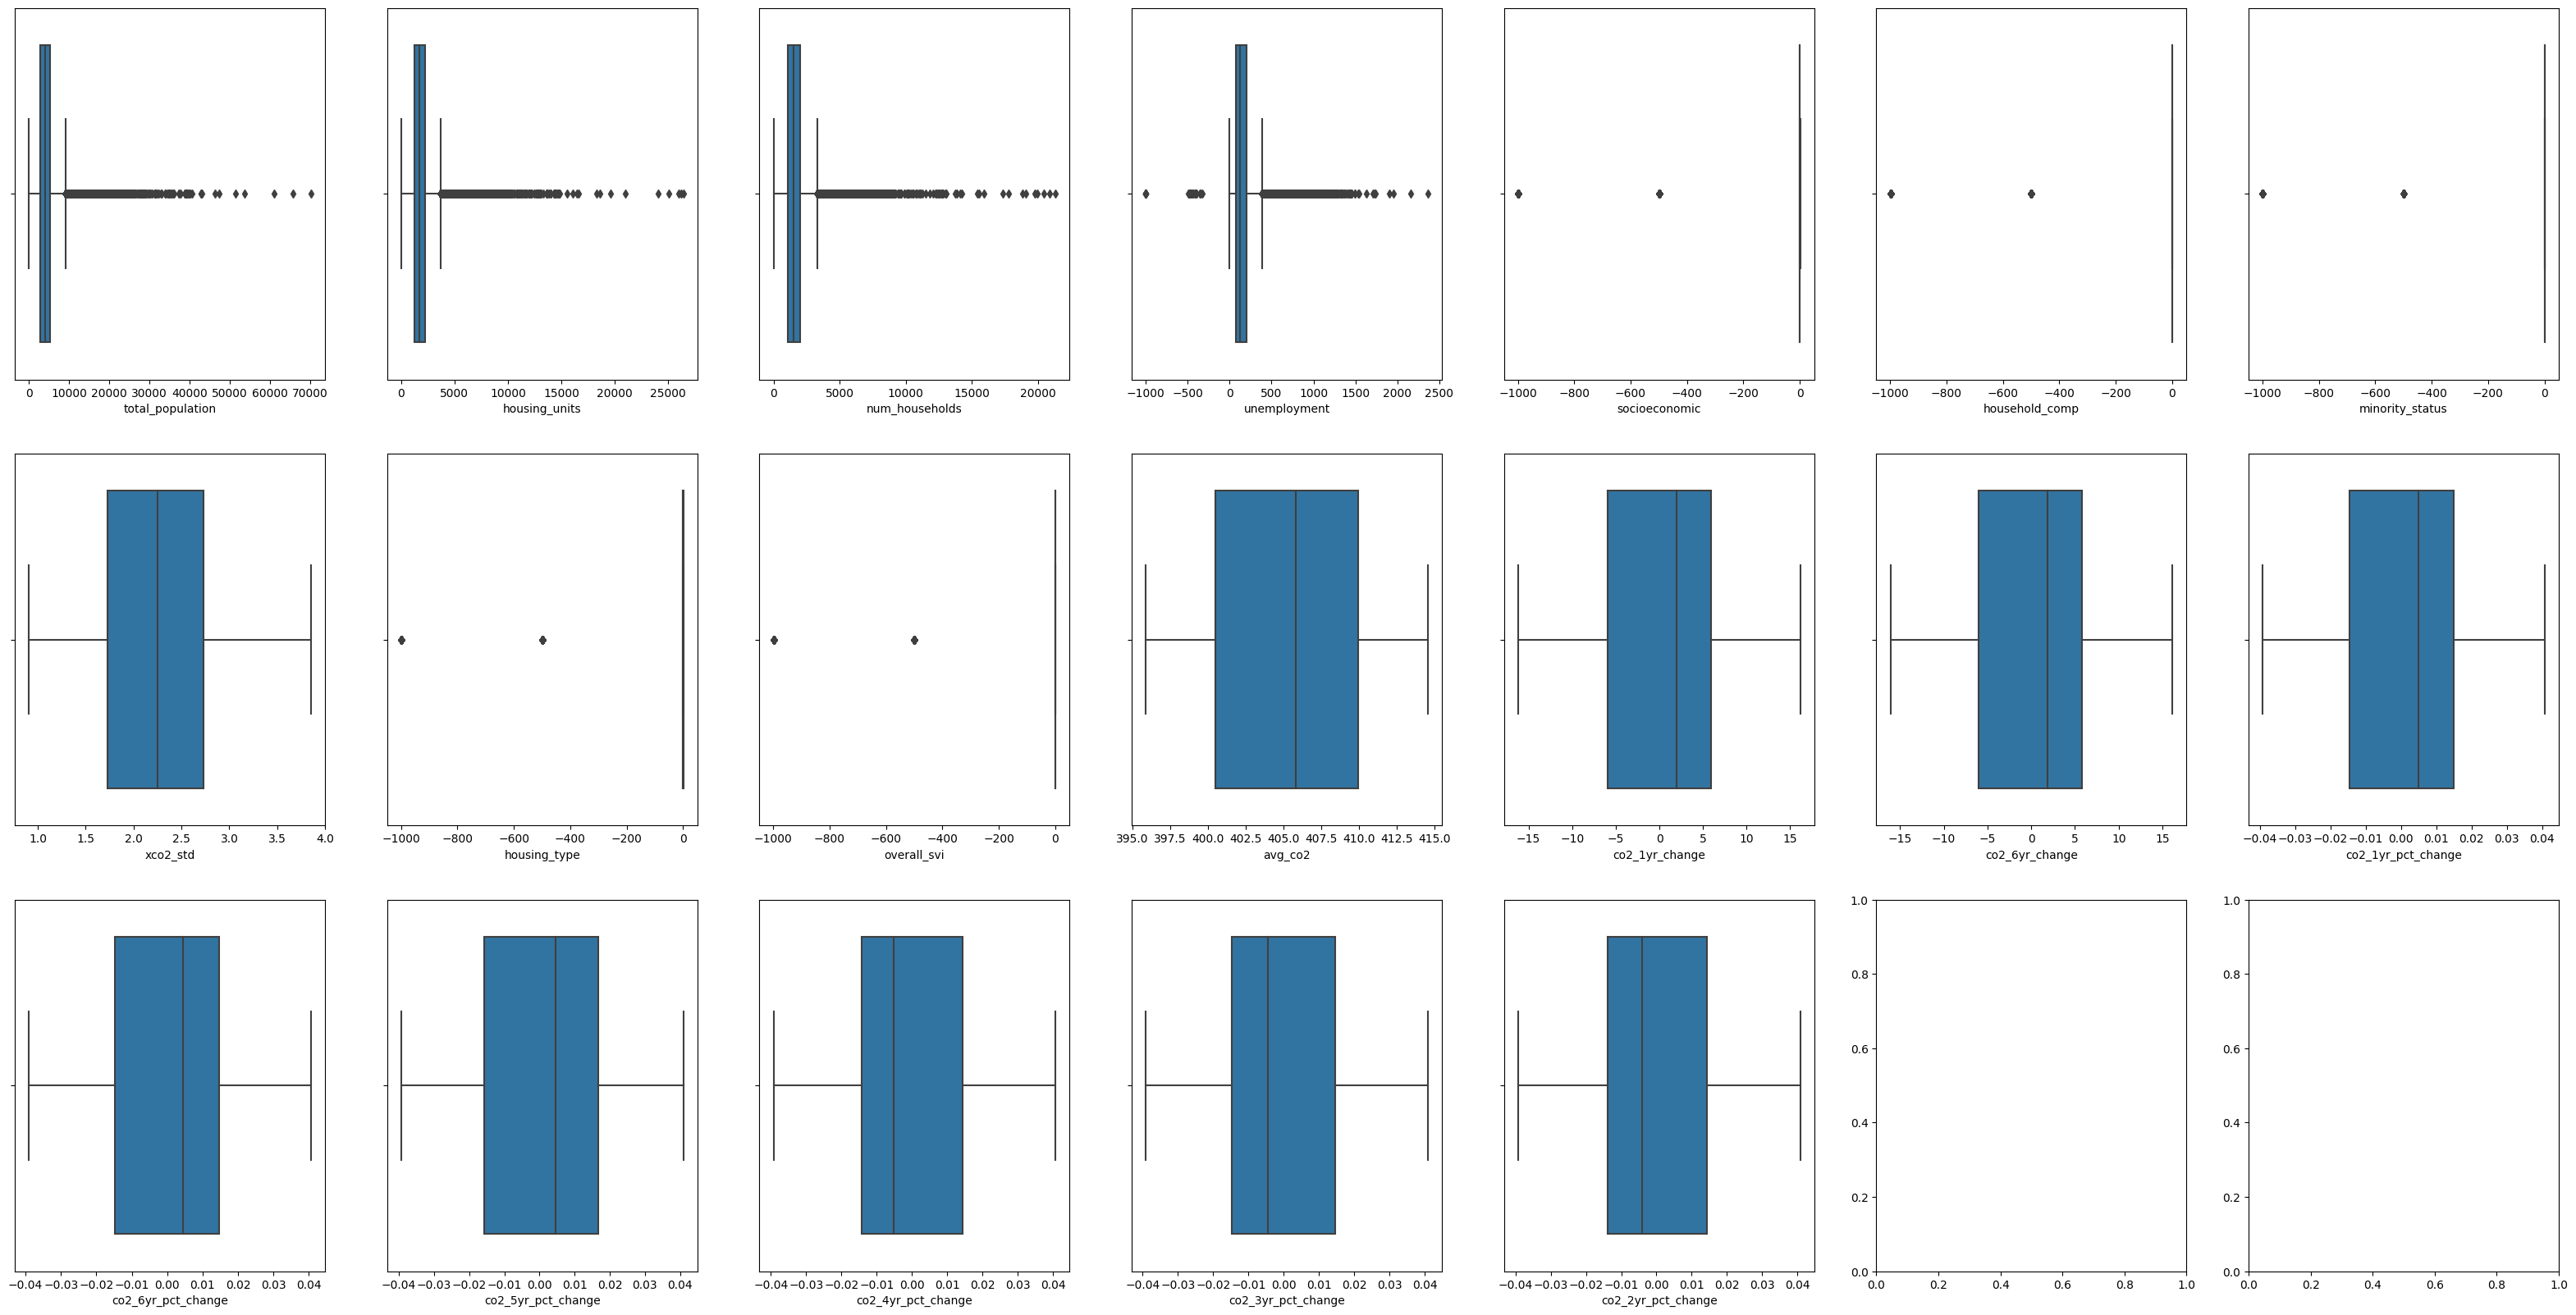

In [4]:
#focussing on only the numeric fields
forplot=df[['total_population', 'housing_units','num_households', 'unemployment', 'socioeconomic', 'household_comp','minority_status', 'housing_type',
        'overall_svi', 'avg_co2', 'xco2_std','co2_1yr_change', 'co2_6yr_change', 'co2_1yr_pct_change','co2_6yr_pct_change',
        'co2_5yr_pct_change', 'co2_4yr_pct_change','co2_3yr_pct_change', 'co2_2yr_pct_change']]

fig, ax =plt.subplots(3,7, figsize=(40, 20))

sns.boxplot(data=forplot, x='total_population', ax=ax[0,0])
sns.boxplot(data=forplot, x='housing_units', ax=ax[0,1])
sns.boxplot(data=forplot, x='num_households', ax=ax[0,2])
sns.boxplot(data=forplot, x='unemployment', ax=ax[0,3])
sns.boxplot(data=forplot, x='socioeconomic', ax=ax[0,4])
sns.boxplot(data=forplot, x='household_comp', ax=ax[0,5])
sns.boxplot(data=forplot, x='minority_status', ax=ax[0,6])

sns.boxplot(data=forplot, x='xco2_std', ax=ax[1,0])
sns.boxplot(data=forplot, x='housing_type', ax=ax[1,1])
sns.boxplot(data=forplot, x='overall_svi', ax=ax[1,2])
sns.boxplot(data=forplot, x='avg_co2', ax=ax[1,3])
sns.boxplot(data=forplot, x='co2_1yr_change', ax=ax[1,4])
sns.boxplot(data=forplot, x='co2_6yr_change', ax=ax[1,5])
sns.boxplot(data=forplot, x='co2_1yr_pct_change', ax=ax[1,6])

sns.boxplot(data=forplot, x='co2_6yr_pct_change', ax=ax[2,0])
sns.boxplot(data=forplot, x='co2_5yr_pct_change', ax=ax[2,1])
sns.boxplot(data=forplot, x='co2_4yr_pct_change', ax=ax[2,2])
sns.boxplot(data=forplot, x='co2_3yr_pct_change', ax=ax[2,3])
sns.boxplot(data=forplot, x='co2_2yr_pct_change', ax=ax[2,4])




### Drop Outliers

Approach 1

In [5]:
"""def detect_outlier(df):
    index=[]
    threshold=3
    for field in df:
        values=df[field]
        mean = np.mean(values)
        std =np.std(values)
       
        for ind in range(len(df)):
            val=values[ind]
            z_score= (val - mean)/std 
            if np.abs(z_score) > threshold:
                index.append(ind)
        
    return index"""

'def detect_outlier(df):\n    index=[]\n    threshold=3\n    for field in df:\n        values=df[field]\n        mean = np.mean(values)\n        std =np.std(values)\n       \n        for ind in range(len(df)):\n            val=values[ind]\n            z_score= (val - mean)/std \n            if np.abs(z_score) > threshold:\n                index.append(ind)\n        \n    return index'

In [6]:
"""df_drop=df[['socioeconomic', 'household_comp','minority_status', 'housing_type','overall_svi']]

indicies=np.unique(detect_outlier(df_drop))
df_bad=df.loc[indicies]
#display(df_bad.describe())

df_cleaned=df.drop(indicies)
display(df_cleaned.describe())

forplot=df_cleaned[['total_population', 'housing_units','num_households', 'unemployment', 'socioeconomic', 'household_comp','minority_status', 'housing_type',
        'overall_svi', 'avg_co2', 'xco2_std','co2_1yr_change', 'co2_6yr_change', 'co2_1yr_pct_change','co2_6yr_pct_change',
        'co2_5yr_pct_change', 'co2_4yr_pct_change','co2_3yr_pct_change', 'co2_2yr_pct_change']]

for column in forplot:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=forplot, x=column)"""

"df_drop=df[['socioeconomic', 'household_comp','minority_status', 'housing_type','overall_svi']]\n\nindicies=np.unique(detect_outlier(df_drop))\ndf_bad=df.loc[indicies]\n#display(df_bad.describe())\n\ndf_cleaned=df.drop(indicies)\ndisplay(df_cleaned.describe())\n\nforplot=df_cleaned[['total_population', 'housing_units','num_households', 'unemployment', 'socioeconomic', 'household_comp','minority_status', 'housing_type',\n        'overall_svi', 'avg_co2', 'xco2_std','co2_1yr_change', 'co2_6yr_change', 'co2_1yr_pct_change','co2_6yr_pct_change',\n        'co2_5yr_pct_change', 'co2_4yr_pct_change','co2_3yr_pct_change', 'co2_2yr_pct_change']]\n\nfor column in forplot:\n        plt.figure(figsize=(17,1))\n        sns.boxplot(data=forplot, x=column)"

Approach 2

485366
481356


array([[<Axes: title={'center': 'total_population'}>,
        <Axes: title={'center': 'housing_units'}>,
        <Axes: title={'center': 'num_households'}>,
        <Axes: title={'center': 'unemployment'}>],
       [<Axes: title={'center': 'socioeconomic'}>,
        <Axes: title={'center': 'household_comp'}>,
        <Axes: title={'center': 'minority_status'}>,
        <Axes: title={'center': 'housing_type'}>],
       [<Axes: title={'center': 'overall_svi'}>,
        <Axes: title={'center': 'avg_co2'}>,
        <Axes: title={'center': 'xco2_std'}>,
        <Axes: title={'center': 'co2_1yr_change'}>],
       [<Axes: title={'center': 'co2_6yr_change'}>,
        <Axes: title={'center': 'co2_1yr_pct_change'}>,
        <Axes: title={'center': 'co2_6yr_pct_change'}>,
        <Axes: title={'center': 'co2_5yr_pct_change'}>],
       [<Axes: title={'center': 'co2_4yr_pct_change'}>,
        <Axes: title={'center': 'co2_3yr_pct_change'}>,
        <Axes: title={'center': 'co2_2yr_pct_change'}>, <Ax

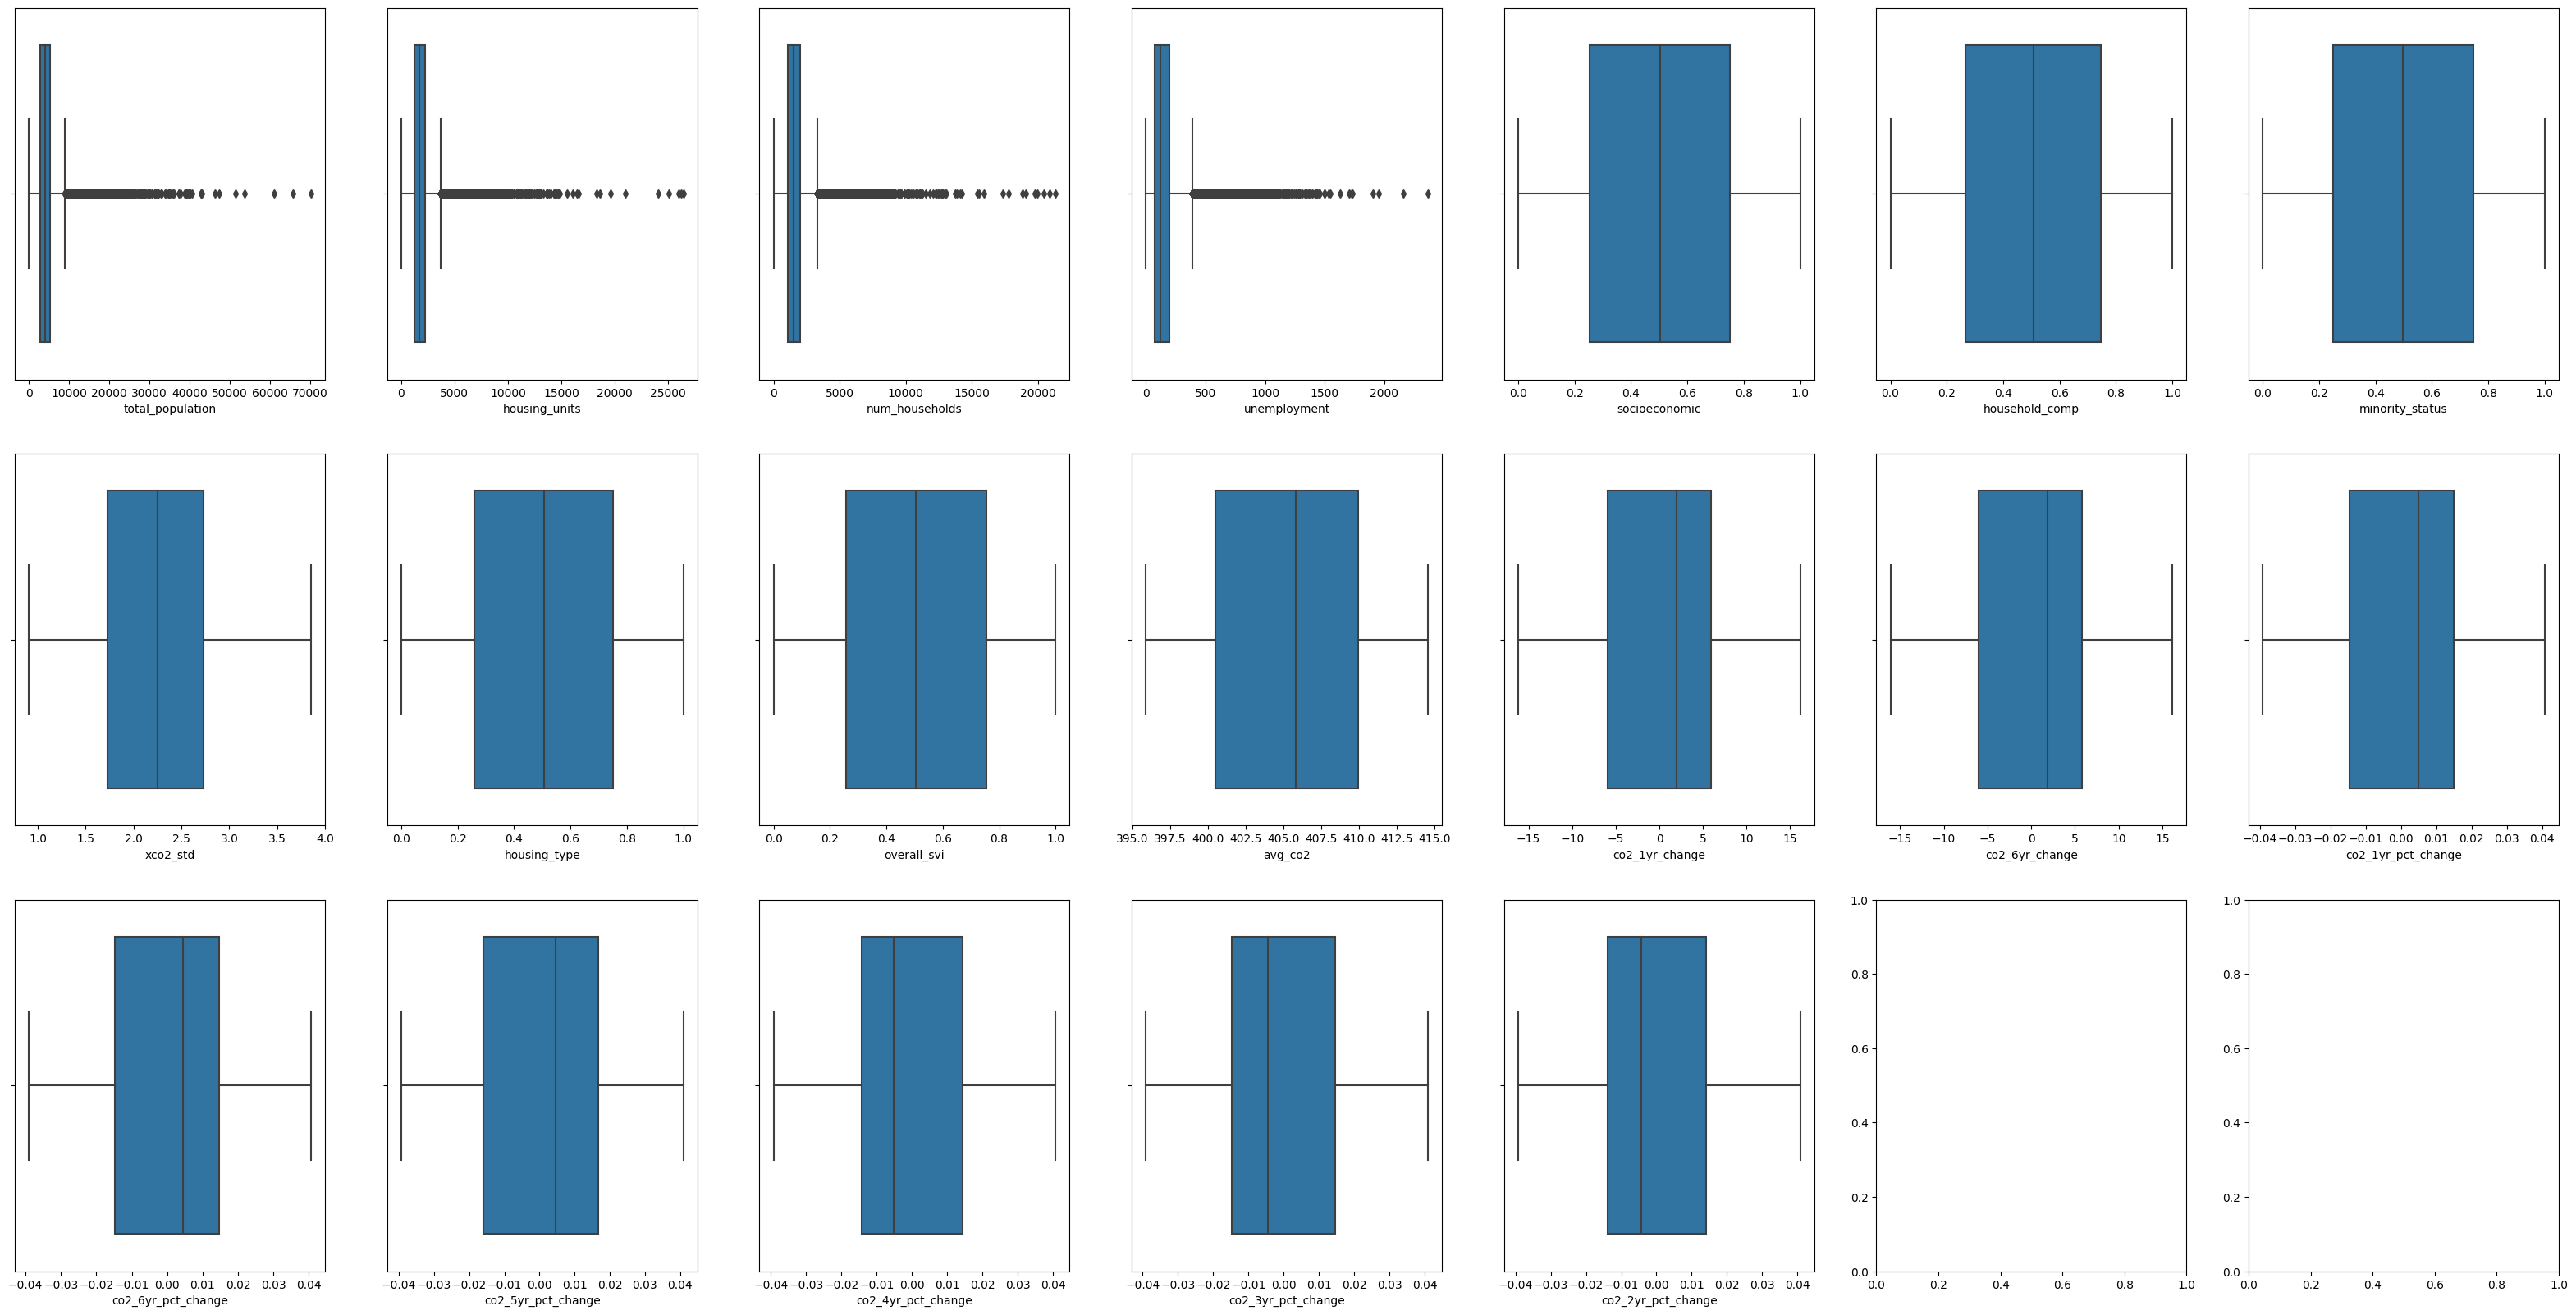

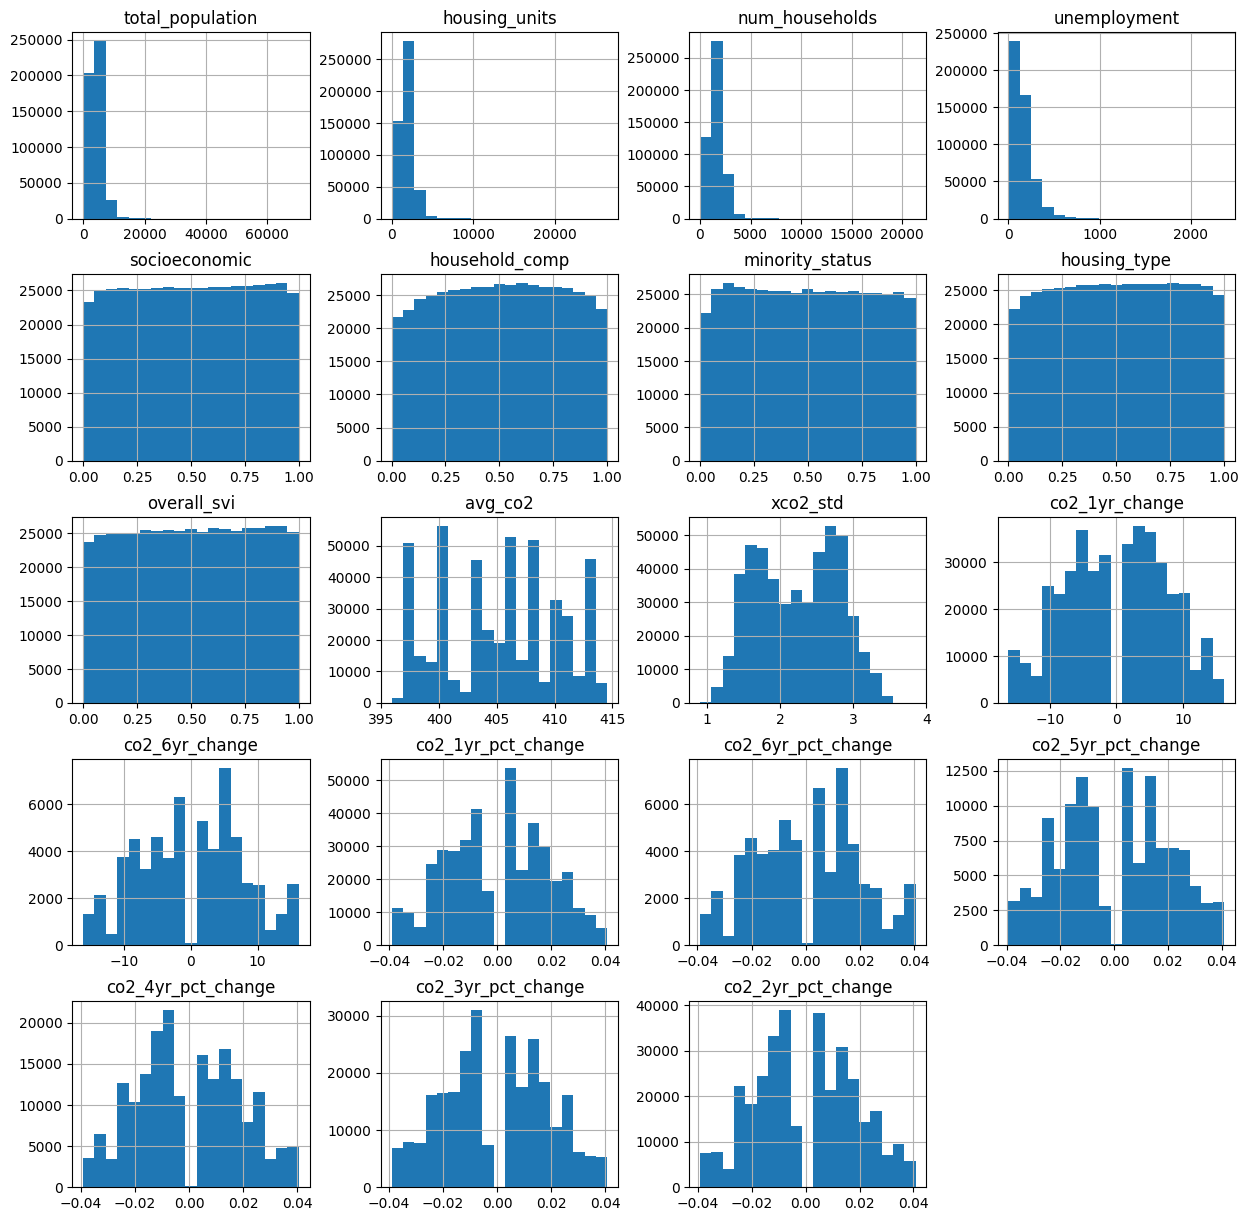

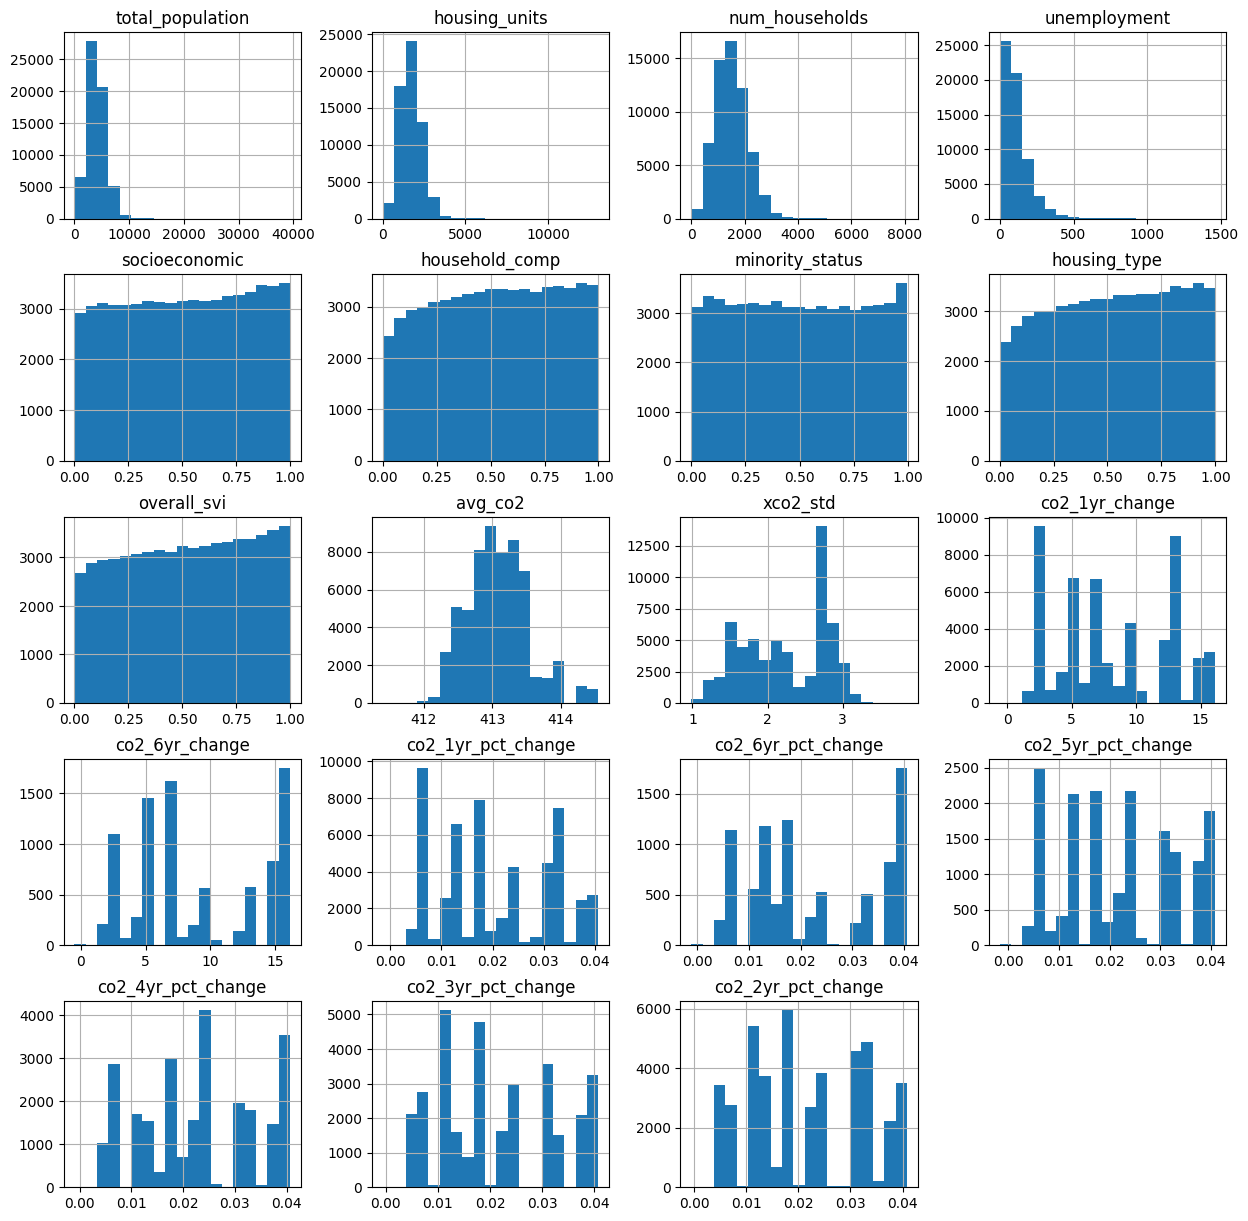

In [7]:
print(len(df))
df=df.query('socioeconomic >= 0 & household_comp >= 0 & minority_status >= 0 & housing_type >= 0 and overall_svi >=0')
print(len(df))

#df=df.query('year == 2018')

forplot=df[['total_population', 'housing_units','num_households', 'unemployment', 'socioeconomic', 'household_comp','minority_status', 'housing_type',
        'overall_svi', 'avg_co2', 'xco2_std','co2_1yr_change', 'co2_6yr_change', 'co2_1yr_pct_change','co2_6yr_pct_change',
        'co2_5yr_pct_change', 'co2_4yr_pct_change','co2_3yr_pct_change', 'co2_2yr_pct_change']]

fig, ax =plt.subplots(3,7, figsize=(40, 20))

sns.boxplot(data=forplot, x='total_population', ax=ax[0,0])
sns.boxplot(data=forplot, x='housing_units', ax=ax[0,1])
sns.boxplot(data=forplot, x='num_households', ax=ax[0,2])
sns.boxplot(data=forplot, x='unemployment', ax=ax[0,3])
sns.boxplot(data=forplot, x='socioeconomic', ax=ax[0,4])
sns.boxplot(data=forplot, x='household_comp', ax=ax[0,5])
sns.boxplot(data=forplot, x='minority_status', ax=ax[0,6])

sns.boxplot(data=forplot, x='xco2_std', ax=ax[1,0])
sns.boxplot(data=forplot, x='housing_type', ax=ax[1,1])
sns.boxplot(data=forplot, x='overall_svi', ax=ax[1,2])
sns.boxplot(data=forplot, x='avg_co2', ax=ax[1,3])
sns.boxplot(data=forplot, x='co2_1yr_change', ax=ax[1,4])
sns.boxplot(data=forplot, x='co2_6yr_change', ax=ax[1,5])
sns.boxplot(data=forplot, x='co2_1yr_pct_change', ax=ax[1,6])

sns.boxplot(data=forplot, x='co2_6yr_pct_change', ax=ax[2,0])
sns.boxplot(data=forplot, x='co2_5yr_pct_change', ax=ax[2,1])
sns.boxplot(data=forplot, x='co2_4yr_pct_change', ax=ax[2,2])
sns.boxplot(data=forplot, x='co2_3yr_pct_change', ax=ax[2,3])
sns.boxplot(data=forplot, x='co2_2yr_pct_change', ax=ax[2,4])

df_hist=df[['total_population', 'housing_units','num_households', 'unemployment', 'socioeconomic', 'household_comp','minority_status', 'housing_type',
        'overall_svi', 'avg_co2', 'xco2_std','co2_1yr_change', 'co2_6yr_change', 'co2_1yr_pct_change','co2_6yr_pct_change',
        'co2_5yr_pct_change', 'co2_4yr_pct_change','co2_3yr_pct_change', 'co2_2yr_pct_change']]
df_hist.hist(bins=19, figsize=(15, 15))
df_hist_2020=df[df['year']==2020]
df_hist_2020=df_hist_2020[['total_population', 'housing_units','num_households', 'unemployment', 'socioeconomic', 'household_comp','minority_status', 'housing_type',
        'overall_svi', 'avg_co2', 'xco2_std','co2_1yr_change', 'co2_6yr_change', 'co2_1yr_pct_change','co2_6yr_pct_change',
        'co2_5yr_pct_change', 'co2_4yr_pct_change','co2_3yr_pct_change', 'co2_2yr_pct_change']]
df_hist_2020.hist(bins=19, figsize=(15, 15))


Double checking against svi dataset

array([[<Axes: title={'center': 'ST'}>,
        <Axes: title={'center': 'STCNTY'}>,
        <Axes: title={'center': 'FIPS'}>,
        <Axes: title={'center': 'E_TOTPOP'}>],
       [<Axes: title={'center': 'E_HU'}>,
        <Axes: title={'center': 'E_HH'}>,
        <Axes: title={'center': 'E_UNEMP'}>,
        <Axes: title={'center': 'RPL_THEME1'}>],
       [<Axes: title={'center': 'RPL_THEME2'}>,
        <Axes: title={'center': 'RPL_THEME3'}>,
        <Axes: title={'center': 'RPL_THEME4'}>,
        <Axes: title={'center': 'RPL_THEMES'}>],
       [<Axes: title={'center': 'YEAR'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

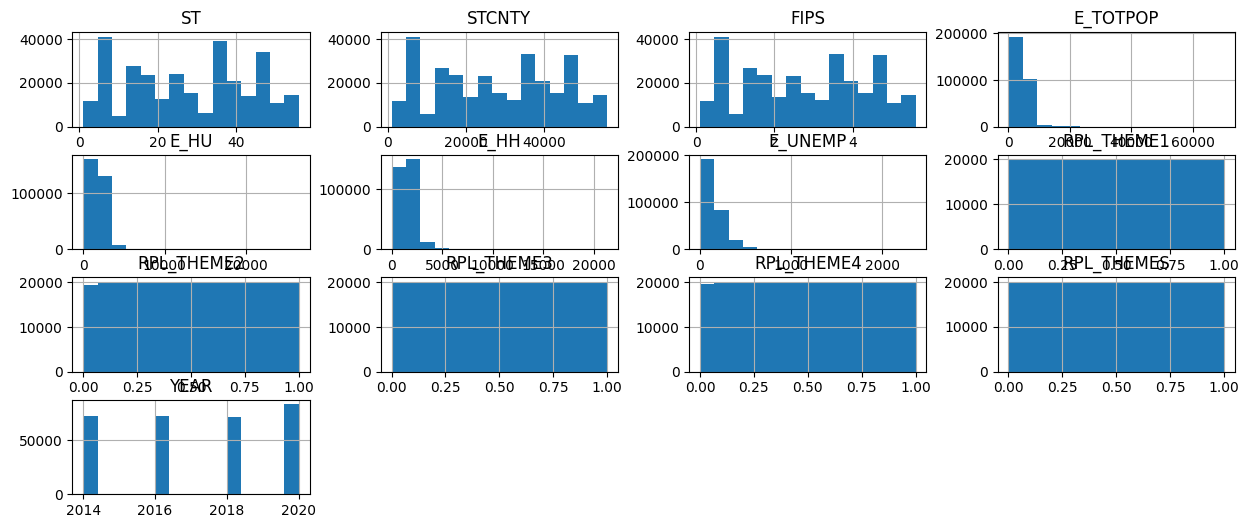

In [8]:
def whitespace_remover(dataframe):
   
    # iterating over the columns
    for i in dataframe.columns:
         
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
             
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:
             
            # if condn. is False then it will do nothing.
            pass


df_svi_2014= pd.read_csv(local_path+"SVI_2014_US.csv")
df_svi_2016= pd.read_csv(local_path+"SVI_2016_US.csv")
df_svi_2018= pd.read_csv(local_path+"SVI_2018_US.csv")
df_svi_2020= pd.read_csv(local_path+"SVI_2020_US.csv")
pd.set_option('display.max_columns', None)

#Getting the columns that match from each dataframe
match_20142016=(set(df_svi_2014.columns) & set(df_svi_2016.columns))
match_201420162018=(match_20142016 & set(df_svi_2018.columns))
match_2014201620182020=(match_201420162018 & set(df_svi_2020.columns))

subset=[]
for i in ['ST', 'STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION', 'E_TOTPOP','E_HU', 'E_PCI', 'E_HH', 'E_UNEMP', 'E_POV', 'RPL_THEME1','RPL_THEME2','RPL_THEME3', 'RPL_THEME4','RPL_THEMES']:
    if i in match_2014201620182020:
        #print("Yes,",i, "is in this set")
        subset.append(i)

df_svi_2014=df_svi_2014[subset]
df_svi_2014['YEAR']=2014

df_svi_2016=df_svi_2016[subset]
df_svi_2016['YEAR']=2016

df_svi_2018=df_svi_2018[subset]
df_svi_2018['YEAR']=2018

df_svi_2020=df_svi_2020[subset]
df_svi_2020['YEAR']=2020

df_svi = pd.concat([df_svi_2014,df_svi_2016,df_svi_2018,df_svi_2020],ignore_index=True)

#formatting
df_svi=df_svi.sort_values(by=['FIPS','YEAR']).reset_index(drop=True)
df_svi['STATE']=df_svi['STATE'].str.upper()

# applying whitespace_remover function on dataframe
whitespace_remover(df_svi)

df_svi=df_svi.query('RPL_THEME1 >= 0 & RPL_THEME2 >= 0 & RPL_THEME3 >= 0 & RPL_THEME4 >= 0 and RPL_THEMES >=0')
df_svi.hist(bins=15, figsize=(15, 6))

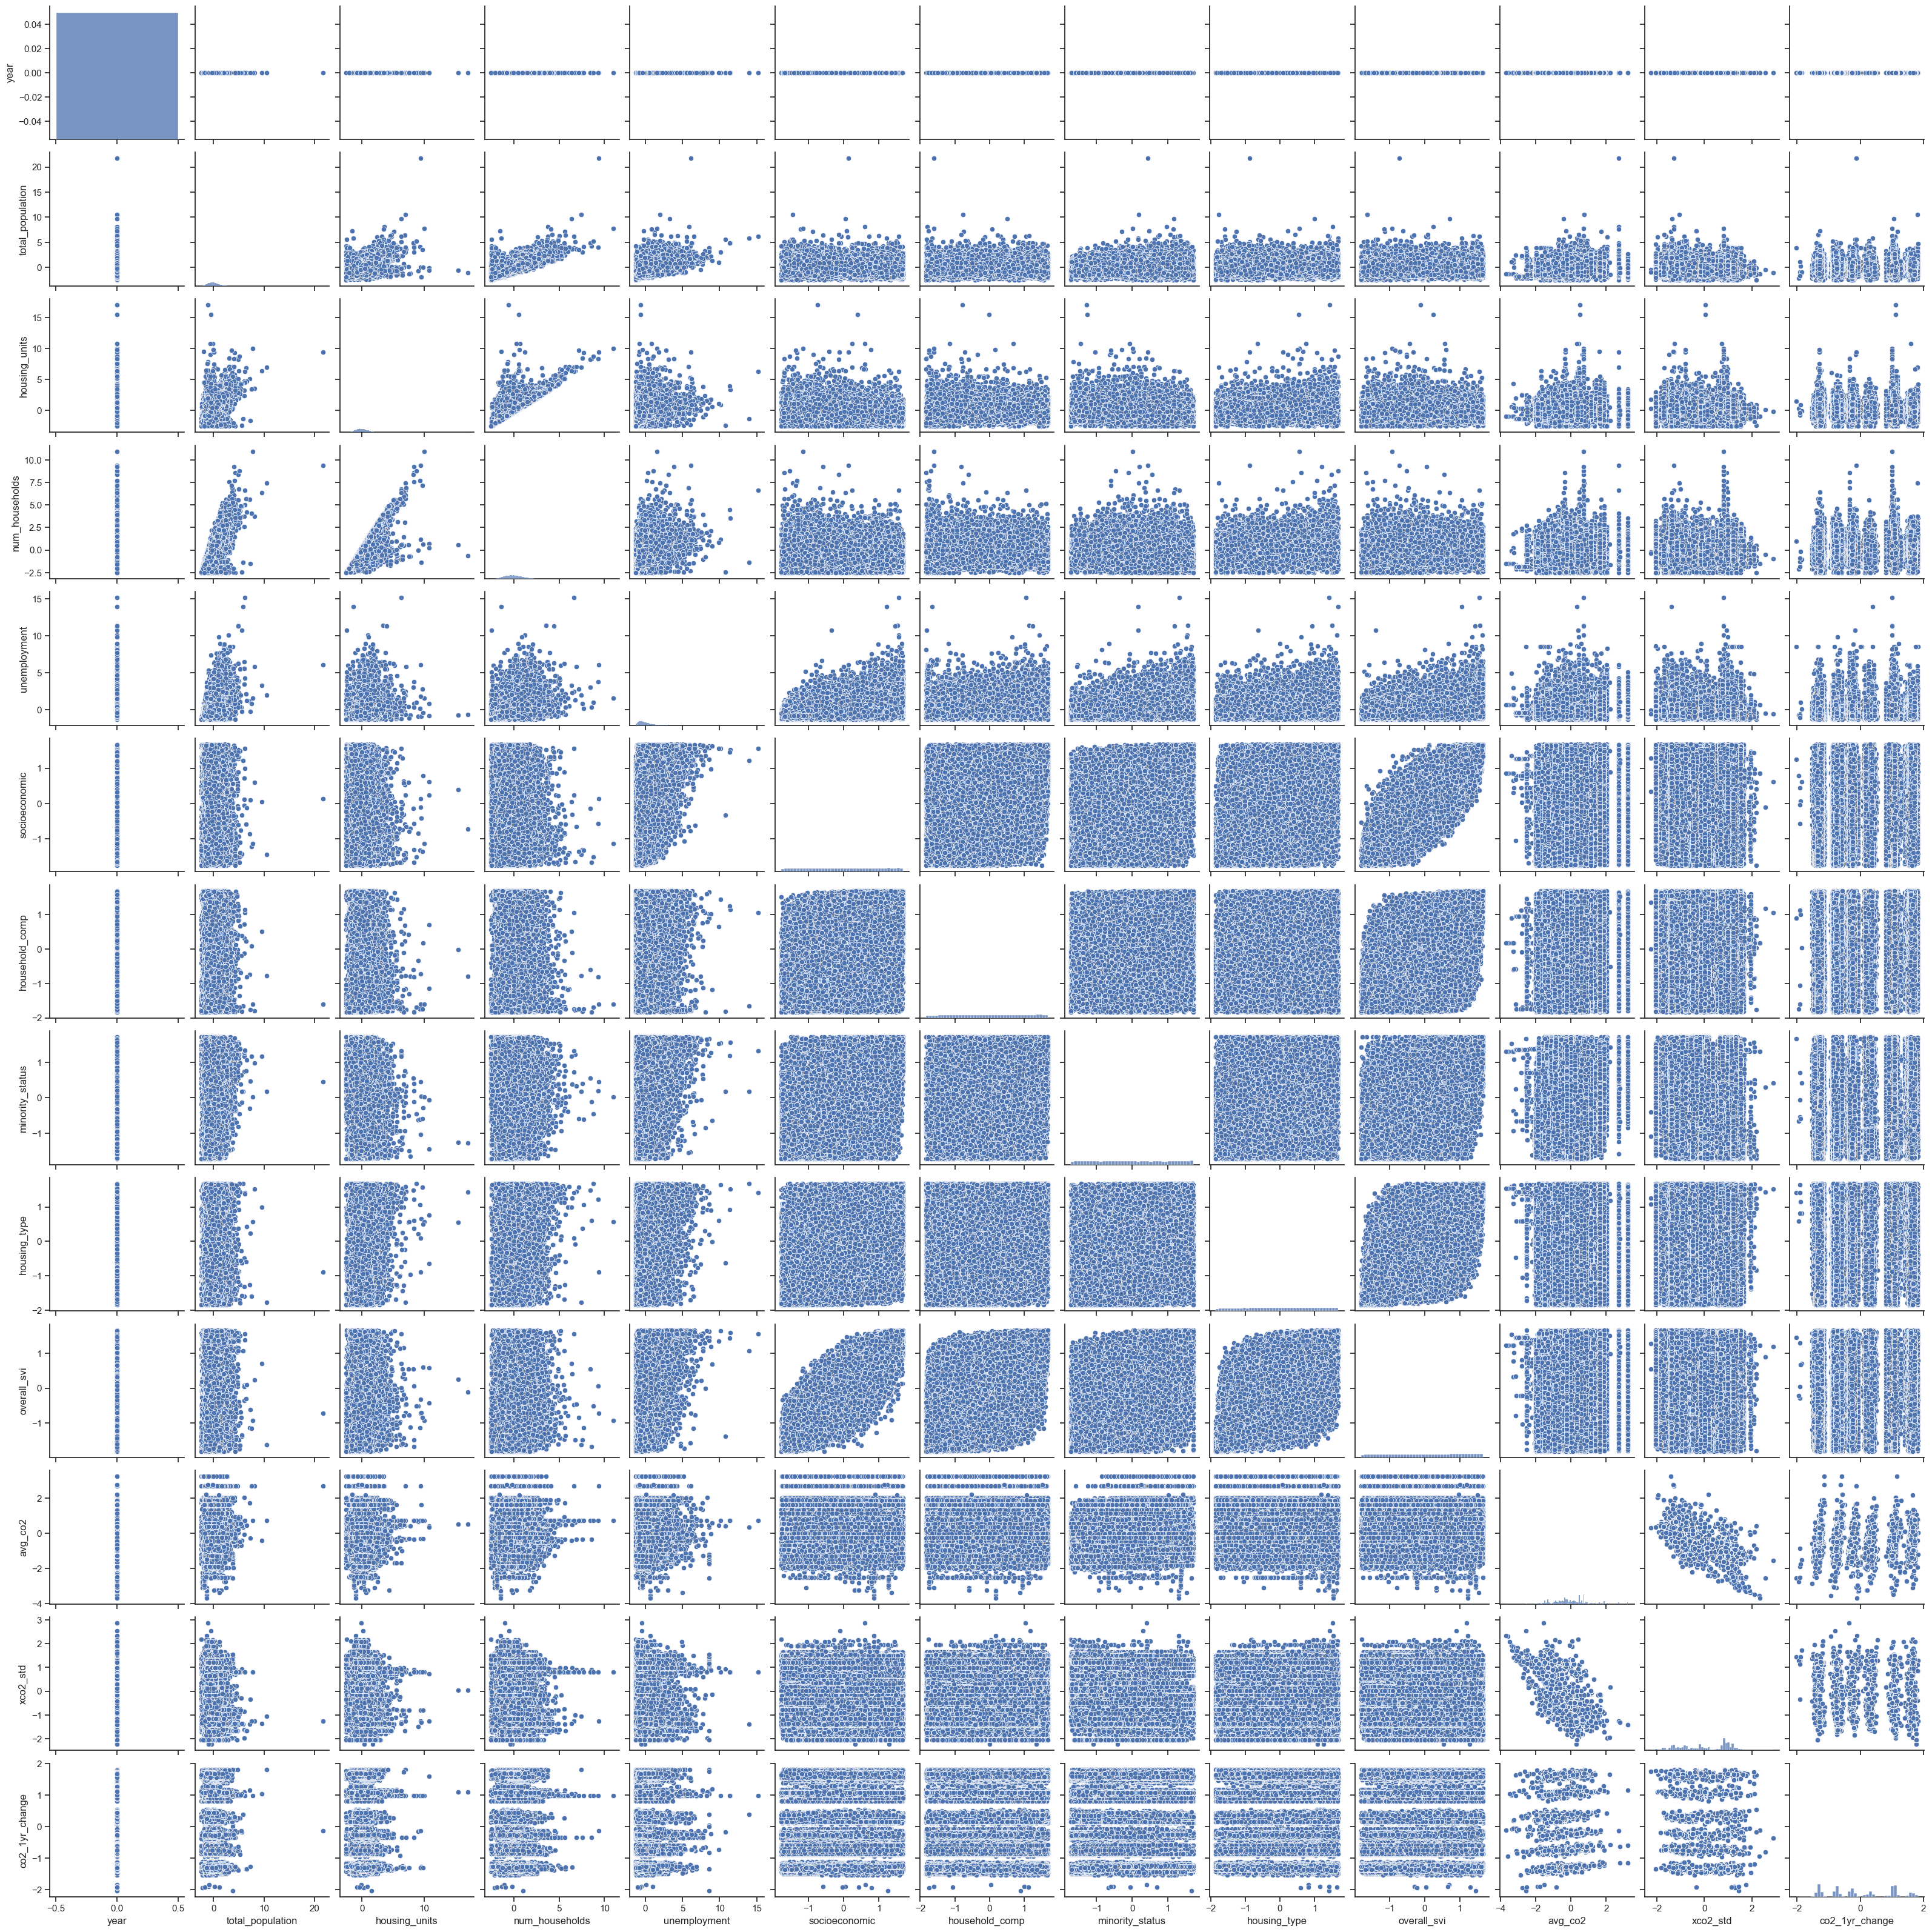

In [9]:
df_numeric=df[['year','total_population','housing_units','num_households','unemployment','socioeconomic','household_comp','minority_status','housing_type','overall_svi', 'avg_co2', 'xco2_std','co2_1yr_change']]
df_numeric=df_numeric.query('year == 2020')

columns = df_numeric.columns

#Initialize scaler
scaler = StandardScaler()

#scale the data
clus_df = pd.DataFrame(scaler.fit_transform(df_numeric))

#Rename plot_df's columns
clus_df.columns = columns

sns.set(style="ticks")
sns.pairplot(data= clus_df)

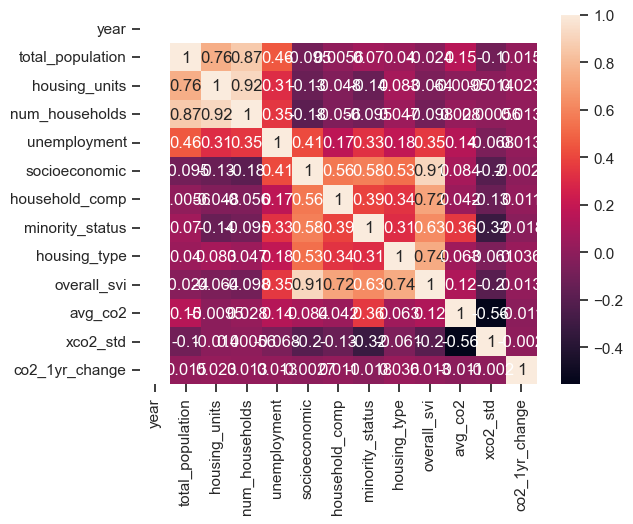

In [10]:
ax = sns.heatmap(clus_df.corr(), annot=True)